# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [279]:
import pandas as pd

## imports for Python, Pandas

In [280]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [ ]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [ ]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

In [ ]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [ ]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

In [ ]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [281]:
wbd = json.load((open('data/world_bank_projects.json')))

In [282]:
wbdf = pd.read_json('data/world_bank_projects.json')

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64


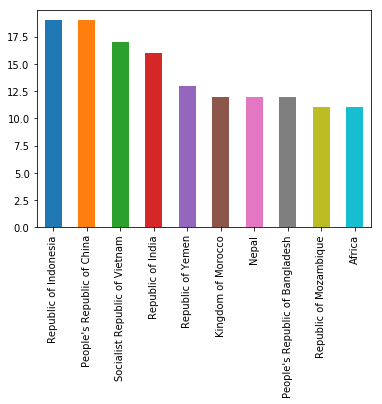

In [307]:
common_countries = wbdf['countryname'].value_counts().head(10)
print(common_countries)
common_countries.plot(kind='bar')

In [285]:
from collections import Counter

c = Counter(wbdf['countryname'])
pd.DataFrame(c.most_common(10))

,0,1
0,People's Republic of China,19
1,Republic of Indonesia,19
2,Socialist Republic of Vietnam,17
3,Republic of India,16
4,Republic of Yemen,13
5,Kingdom of Morocco,12
6,Nepal,12
7,People's Republic of Bangladesh,12
8,Republic of Mozambique,11
9,Africa,11


Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64


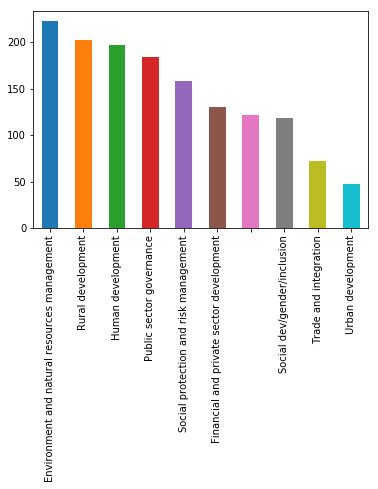

In [310]:
theme = json_normalize(wbd, 'mjtheme_namecode')
common_theme = theme.name.value_counts().head(10)
print(common_theme)
common_theme.plot(kind='bar')

In [311]:
theme = json_normalize(wbd, 'mjtheme_namecode')
pd.DataFrame(Counter(theme['name']).most_common(10))

,0,1
0,Environment and natural resources management,223
1,Rural development,202
2,Human development,197
3,Public sector governance,184
4,Social protection and risk management,158
5,Financial and private sector development,130
6,,122
7,Social dev/gender/inclusion,119
8,Trade and integration,72
9,Urban development,47


In [316]:
# create copy of dataframe
theme2 = theme.copy()

#Create dictionary of matching codes and names
code_name = {}
for idx, row in theme2.iterrows():
    if row[0] not in code_name:
        if len(row[1]) > 1:
            code_name[row[0]] = row[1]
theme2['name'] = theme2['code'].map(code_name)

#Print the original data and the updated dataframe for comparison
print(theme.head())
print()
print(theme2.head())

  code                                   name
0    8                      Human development
1   11                                       
2    1                    Economic management
3    6  Social protection and risk management
4    5                  Trade and integration

  code                                          name
0    8                             Human development
1   11  Environment and natural resources management
2    1                           Economic management
3    6         Social protection and risk management
4    5                         Trade and integration


In [336]:
from collections import defaultdict

theme3 = theme.copy()

c_n2 = defaultdict(list)

for idx, row in theme3.iterrows():
    if row[0] not in c_n2:
        if len(row[1])> 1:
            c_n2[row[0]] = row[1]
            
theme3['name'].replace(to_replace='', value='NaN')
theme3

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion
